In [189]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import re

In [2]:
# Model Opening
model_path = 'SIE'
model_ver = 'SIE_POS'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result

with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'SIE/SIE_POS', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(1, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.58e+02, 20.80, 20.75, 0.12, -4.0, 0.0, 0.0)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be done again whenever model parameters are changed\n',
 'glafic.model_init(verb = 0)\n',
 '\n',
 "glafic.readobs_point('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Len

In [3]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

1
1


In [81]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
lens_sie_line = next(line for line in reversed(opt_result) if 'lens   sie' in line)

print(lens_sie_line)

# Extract the values from the line
lens_sie_values = lens_sie_line.split()[2:]
lens_sie_values = [str(value) for value in lens_sie_values]
lens_sie_values

# Find the line containing 'glafic.set_point' in opt_result
set_point_line = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line)

# Extract the values from the line
set_point_values = set_point_line.split()[1:]
set_point_values = [str(value) for value in set_point_values]
set_point_values


lens   sie     0.2613  1.580350e+02  2.080960e+01  2.075891e+01  1.287589e-01 -4.437098e+00  0.000000e+00  0.000000e+00 

point  1.0000  2.081270e+01  2.078004e+01 



['1.0000', '2.081270e+01', '2.078004e+01']

In [119]:
r1 = 0.03
r2 = 0.8
n = 1000
len_num = 1

# Read the existing file contents
with open('kappa_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, 'sie', {lens_sie_values[0]}, {lens_sie_values[1]}, {lens_sie_values[2]}, {lens_sie_values[3]}, {lens_sie_values[4]}, {lens_sie_values[5]}, {lens_sie_values[6]}, {lens_sie_values[7]})\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values is not None and len(set_point_values) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values[0]}, {set_point_values[1]})\n"
            else:
                print("set_point_values is not set correctly.")
        elif 'glafic.kapparad(' in line:
            print('Found glafic.kapparad')
            line = f"glafic.kapparad({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        elif 'glafic.kappacum(' in line:
            print('Found glafic.kappacum')
            line = f"glafic.kappacum({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        glafic_file.write(line)

Found glafic.set_lens
Found glafic.set_point
Found glafic.kapparad
Found glafic.kappacum


In [120]:
%run kappa_glafic.py

######## computing radial profile of kappa
 zs = 1.000000e+00,  lens id = 1,  step = 1000
 center = (2.081270e+01, 2.078004e+01),  range = [3.000000e-02, 8.000000e-01]
 output file name = SIE/SIE_POS_kaprad.dat

3.000000e-02 9.624356e+00
3.077000e-02 9.281586e+00
3.154000e-02 8.966928e+00
3.231000e-02 8.677273e+00
3.308000e-02 8.408937e+00
3.385000e-02 8.159330e+00
3.462000e-02 7.926305e+00
3.539000e-02 7.710435e+00
3.616000e-02 7.504983e+00
3.693000e-02 7.311584e+00
3.770000e-02 7.129084e+00
3.847000e-02 6.956490e+00
3.924000e-02 6.792933e+00
4.001000e-02 6.637654e+00
4.078000e-02 6.489981e+00
4.155000e-02 6.349321e+00
4.232000e-02 6.215145e+00
4.309000e-02 6.086979e+00
4.386000e-02 5.964397e+00
4.463000e-02 5.847017e+00
4.540000e-02 5.734491e+00
4.617000e-02 5.626504e+00
4.694000e-02 5.522770e+00
4.771000e-02 5.423028e+00
4.848000e-02 5.327037e+00
4.925000e-02 5.234577e+00
5.002000e-02 5.145449e+00
5.079000e-02 5.059464e+00
5.156000e-02 4.976451e+00
5.233000e-02 4.896251e+00
5.310000

81e+00
3.734200e-01 1.307760e+00
3.741900e-01 1.304954e+00
3.749600e-01 1.302162e+00
3.757300e-01 1.299384e+00
3.765000e-01 1.296621e+00
3.772700e-01 1.293871e+00
3.780400e-01 1.291135e+00
3.788100e-01 1.288413e+00
3.795800e-01 1.285704e+00
3.803500e-01 1.283008e+00
3.811200e-01 1.280326e+00
3.818900e-01 1.277657e+00
3.826600e-01 1.275000e+00
3.834300e-01 1.272357e+00
3.842000e-01 1.269726e+00
3.849700e-01 1.267108e+00
3.857400e-01 1.264502e+00
3.865100e-01 1.261909e+00
3.872800e-01 1.259328e+00
3.880500e-01 1.256759e+00
3.888200e-01 1.254202e+00
3.895900e-01 1.251658e+00
3.903600e-01 1.249124e+00
3.911300e-01 1.246603e+00
3.919000e-01 1.244093e+00
3.926700e-01 1.241595e+00
3.934400e-01 1.239108e+00
3.942100e-01 1.236633e+00
3.949800e-01 1.234169e+00
3.957500e-01 1.231716e+00
3.965200e-01 1.229274e+00
3.972900e-01 1.226843e+00
3.980600e-01 1.224422e+00
3.988300e-01 1.222013e+00
3.996000e-01 1.219614e+00
4.003700e-01 1.217226e+00
4.011400e-01 1.214849e+00
4.019100e-01 1.212482e+00
4.026

In [ ]:
# Math for img positions 
x_cent = float(set_point_values[1])
y_cent = float(set_point_values[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_fwf(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)

pred_rad = np.sqrt((pred['x'] - x_cent)**2 + (pred['y'] - y_cent)**2)
pred['rad'] = pred_rad
pred

20.8127 20.78004


,x,y,mag,err,rad
0,20.7644,20.3032,-6.7047,1.049,0.479280
1,21.2760,20.9607,13.6533,0.000,0.497278
2,20.3933,21.0459,15.5092,0.056,0.496566
3,20.8199,21.2593,-19.6522,0.168,0.479314


In [122]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

In [178]:
# Percet Height

kap_pred = [data2.loc[(data2['r'] - rad).abs().idxmin(), 'kappa'] for rad in pred['rad']]
kap_max = max(data2['kappa'])

percent_height = [kap/kap_max for kap in kap_pred]
percent_height = [ph + 0.001 for ph in percent_height]

inset_percent_height = [ph + 0.68 for ph in percent_height]


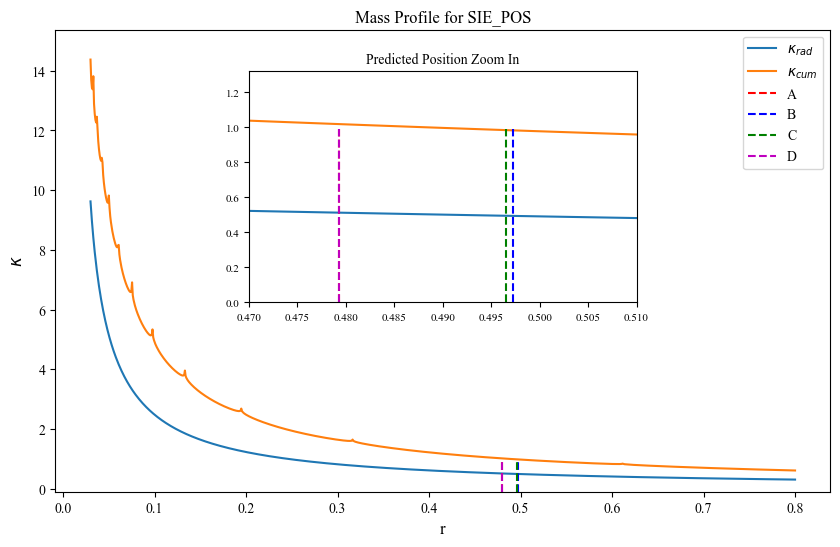

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
plt.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=percent_height[0], ymin=0)
plt.axvline(x=pred['rad'][1], color='b', linestyle='--', label='B', ymax=percent_height[1], ymin=0)
plt.axvline(x=pred['rad'][2], color='g', linestyle='--', label='C', ymax=percent_height[2], ymin=0)
plt.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=percent_height[3], ymin=0)
plt.xlabel('r', fontsize=12)
plt.ylabel('$\kappa$', fontsize=12)
plt.title('Mass Profile for ' + model_ver)
plt.ylim(-0.1, max(data2['kappa']) + 1)
plt.legend()

# Add inset plot
ax_inset = inset_axes(plt.gca(), width="50%", height="50%", loc="upper center", borderpad=3)
ax_inset.plot(data['r'], data['kappa'], label='$\kappa _{rad}$')
ax_inset.plot(data2['r'], data2['kappa'], label='$\kappa _{cum}$')
ax_inset.set_xlim(0.47, 0.51)  # Adjust the x-axis range for the inset
ax_inset.set_ylim(0, max(kap_pred) + 0.3)  # Adjust the y-axis range for the inset
ax_inset.axvline(x=pred['rad'][0], color='r', linestyle='--', label='A', ymax=inset_percent_height[0], ymin=0)
ax_inset.axvline(x=pred['rad'][1], color='b', linestyle='--', label='C', ymax=inset_percent_height[1], ymin=0)
ax_inset.axvline(x=pred['rad'][2], color='g', linestyle='--', label='B', ymax=inset_percent_height[2], ymin=0)
ax_inset.axvline(x=pred['rad'][3], color='m', linestyle='--', label='D', ymax=inset_percent_height[3], ymin=0)
ax_inset.set_title('Predicted Position Zoom In', fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.show()

In [ ]:
# Shear Plots
